In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('CAFE')
from CAFE import utils

In [3]:
import graph_analysis
from graph_analysis import CommunityAnalyzer
from community import community_louvain

import networkx as nx
import numpy as np

In [18]:
kg = utils.load_kg('beauty')
analyzer = CommunityAnalyzer(kg.G)
G = analyzer.build_graph(kg.G)

In [20]:
from collections import Counter
partition = community_louvain.best_partition(G,random_state=42)
community_sizes = Counter(partition.values())
len(community_sizes)

25

# Degree Centrality

In [5]:
def product_degree_centrality(G, number_of_products = 592):
    number_of_products = number_of_products
    if len(G) <= 1:
            return {n: 1 for n in G}

    s = 1.0 / number_of_products
    centrality = {n: d * s for n, d in G.degree()}
    return centrality

In [23]:
import networkx as nx

def adjusted_degree_centrality(G, number_of_products=592):
    # Calculate raw degree centrality for all nodes
    raw_centrality = G.degree()

    # Count the total number of nodes except 'product' type nodes
    non_product_nodes = sum(1 for n in G.nodes if not n.startswith('product'))
    
    # Initialize the centrality dictionary
    centrality = {}

    # Apply different normalization based on node type
    for node, degree in raw_centrality:
        if node.startswith('product'):
            # Normalize by the number of non-product nodes
            centrality[node] = degree / non_product_nodes
        else:
            # Normalize by the number of products
            centrality[node] = degree / number_of_products

    return centrality


In [7]:
degree_centrality = adjusted_degree_centrality(G)

In [9]:
degree_centrality

{'product_0': 0.0014354767833601875,
 'category_0': 1.0,
 'category_4': 0.25675675675675674,
 'category_17': 0.0472972972972973,
 'category_18': 0.010135135135135136,
 'category_19': 0.005067567567567568,
 'brand_1': 0.006756756756756757,
 'word_849': 0.011824324324324325,
 'word_1065': 0.07263513513513513,
 'word_1418': 0.07432432432432433,
 'word_1627': 0.013513513513513514,
 'word_1715': 0.02027027027027027,
 'word_2079': 0.060810810810810814,
 'word_2161': 0.005067567567567568,
 'word_2637': 0.013513513513513514,
 'word_2930': 0.0016891891891891893,
 'word_2940': 0.09966216216216216,
 'word_3316': 0.010135135135135136,
 'word_3614': 0.0016891891891891893,
 'word_4268': 0.02027027027027027,
 'word_4421': 0.07939189189189189,
 'word_4837': 0.015202702702702704,
 'word_4852': 0.06756756756756757,
 'word_4866': 0.030405405405405407,
 'word_5320': 0.015202702702702704,
 'word_5653': 0.005067567567567568,
 'word_8247': 0.08108108108108109,
 'word_8524': 0.0033783783783783786,
 'word_9059

In [10]:
node_types = set()
node_type_centralities = {}

for node, centrality in degree_centrality.items():
    node_type, node_id = node.rsplit('_', 1)
    node_types.add(node_type)
    if node_type not in node_type_centralities:
        node_type_centralities[node_type] = []
    node_type_centralities[node_type].append((node, centrality))

In [11]:
sorted(node_type_centralities['product'], key=lambda x: x[1], reverse=True)

[('product_185', 0.02914896733557932),
 ('product_410', 0.028856012889995605),
 ('product_54', 0.025076900541965725),
 ('product_521', 0.02270396953273766),
 ('product_220', 0.022030174307895122),
 ('product_529', 0.021649333528636298),
 ('product_325', 0.021268492749377473),
 ('product_502', 0.019100629852058005),
 ('product_464', 0.019042038962941262),
 ('product_16', 0.01851472096089058),
 ('product_125', 0.017958107514281528),
 ('product_215', 0.017840925736048046),
 ('product_36', 0.017811630291489675),
 ('product_33', 0.01751867584590596),
 ('product_339', 0.016112494507104145),
 ('product_498', 0.01602460817342903),
 ('product_153', 0.015936721839753917),
 ('product_552', 0.015878130950637177),
 ('product_541', 0.01573165372784532),
 ('product_322', 0.015555881060495094),
 ('product_280', 0.015497290171378351),
 ('product_358', 0.015409403837703237),
 ('product_455', 0.015262926614911382),
 ('product_262', 0.01523363117035301),
 ('product_188', 0.014999267613886041),
 ('product_

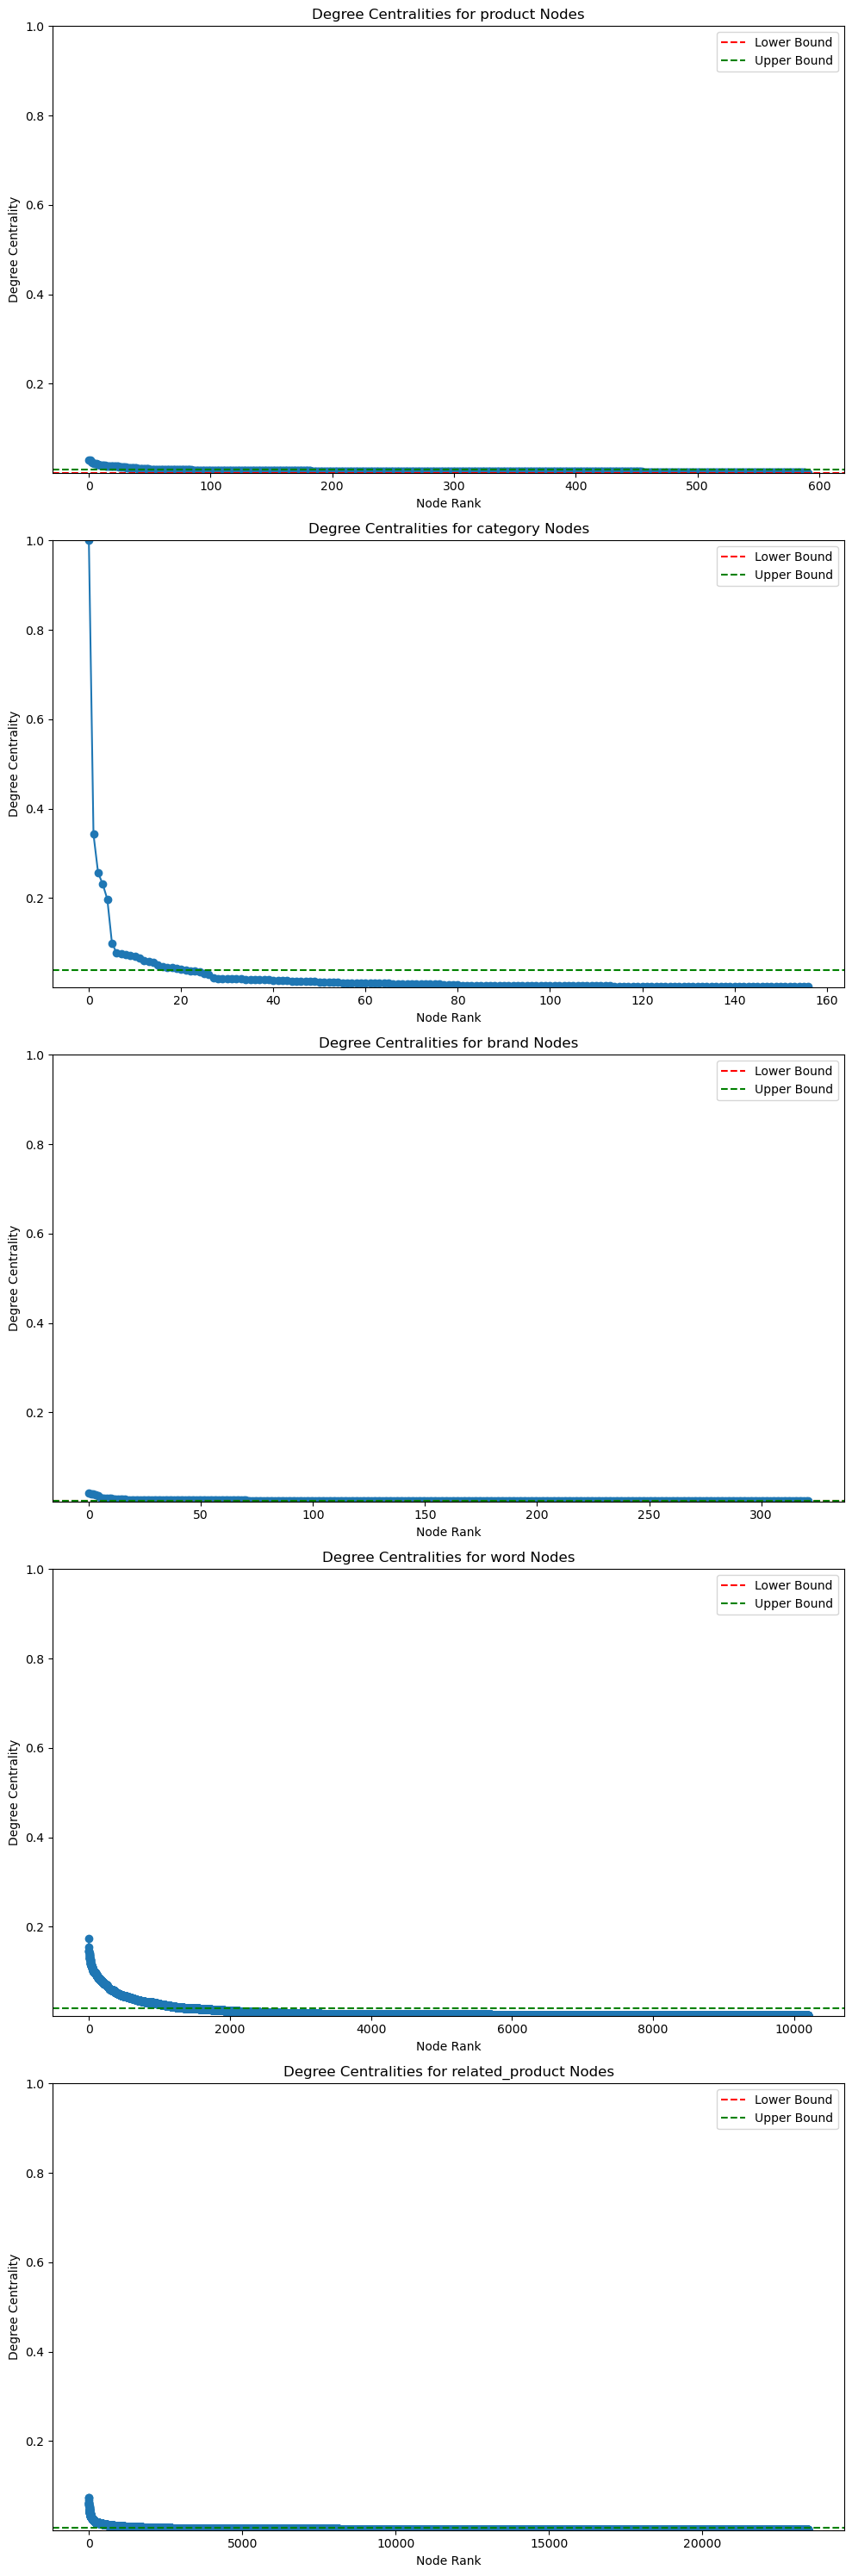

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the degree centralities for each node type
for node_type in node_type_centralities:
    node_type_centralities[node_type].sort(key=lambda x: x[1], reverse=True)

# Function to calculate outlier bounds
def calculate_bounds(data):
    centrality_values = np.array([x[1] for x in data])
    Q1 = np.percentile(centrality_values, 25)
    Q3 = np.percentile(centrality_values, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Determine the number of subplots needed
num_types = len(node_types)
fig, axs = plt.subplots(num_types, 1, figsize=(10, 6 * num_types), squeeze=False)
axs = axs.flatten()

# Determine global minimum and maximum for consistent y-axis scale
all_centrality_values = [value for centralities in node_type_centralities.values() for _, value in centralities]
global_lower_bound = min(all_centrality_values)
global_upper_bound = max(all_centrality_values)

# Plotting each node type in a separate subplot
for ax, node_type in zip(axs, node_type_centralities):
    centralities = node_type_centralities[node_type]
    if centralities:
        nodes, centrality_values = zip(*centralities)
        ax.plot(range(len(centrality_values)), centrality_values, marker='o')
        # Calculate and plot bounds
        lower_bound, upper_bound = calculate_bounds(centralities)
        ax.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound')
        ax.axhline(y=upper_bound, color='green', linestyle='--', label='Upper Bound')
    ax.set_xlabel('Node Rank')
    ax.set_ylabel('Degree Centrality')
    ax.set_title(f'Degree Centralities for {node_type} Nodes')
    ax.set_ylim(global_lower_bound, global_upper_bound)  # Setting the same y-axis limits
    ax.legend()

plt.tight_layout()
plt.show()


# Modularity Before and after outliers

In [13]:
def calculate_modularity(G):
    # Detect communities
    partition = community_louvain.best_partition(G)
    # Calculate the modularity
    modularity = community_louvain.modularity(partition, G)
    return modularity

In [14]:
def remove_outliers_and_calculate_modularity(G, centrality_dict):
    # Determine the bounds for outliers for each type
    type_bounds = {}
    for node in G.nodes():
        node_type = node.split('_')[0]
        if node_type not in type_bounds:
            type_bounds[node_type] = []
        type_bounds[node_type].append(centrality_dict[node])

    # Calculate IQR for each type and determine outlier bounds
    outlier_bounds = {}
    for node_type, values in type_bounds.items():
        q1 = np.percentile(values, 25)
        q3 = np.percentile(values, 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outlier_bounds[node_type] = (lower_bound, upper_bound)

    # Remove outliers
    nodes_to_remove = [node for node in G.nodes() if centrality_dict[node] < outlier_bounds[node.split('_')[0]][0] 
                       or centrality_dict[node] > outlier_bounds[node.split('_')[0]][1]]
    G.remove_nodes_from(nodes_to_remove)

    # Calculate modularity after removing outliers
    new_modularity = calculate_modularity(G)
    return new_modularity

# Example usage
# G = nx.generators.erdos_renyi_graph(100, 0.05)
centrality_dict = adjusted_degree_centrality(G)  # Adjust this to your specific normalization as needed
initial_modularity = calculate_modularity(G)
# modularity_after_removal = remove_outliers_and_calculate_modularity(G.copy(), centrality_dict)
modularity_after_removal = remove_outliers_and_calculate_modularity(G, centrality_dict)

print(f"Initial modularity: {initial_modularity}")
print(f"Modularity after removing outliers: {modularity_after_removal}")


Initial modularity: 0.47257544458421374
Modularity after removing outliers: 0.7768588795667021


# Community Size Distribution

In [74]:
def analyze_community_sizes(partition):
    # Calculate the sizes of each community
    sizes = [len(community) for community in partition]
    
    # Compute mean and standard deviation of community sizes
    mean_size = np.mean(sizes)
    std_dev = np.std(sizes)
    
    print(f"Average community size: {mean_size}")
    print(f"Standard deviation of sizes: {std_dev}")
    
    # Define thresholds for large and small communities based on mean and standard deviation
    large_threshold = mean_size + 2 * std_dev
    small_threshold = mean_size - 2 * std_dev
    
    # Identify large and small communities
    large_communities = [community for community in partition if len(community) > large_threshold]
    small_communities = [community for community in partition if len(community) < small_threshold]
    
    # Output the sizes of large and small communities for verification
    print("Large communities (sizes):", [len(community) for community in large_communities])
    print("Small communities (sizes):", [len(community) for community in small_communities])
    print(f"Minimum community size: {min(sizes)}")
    print(f"Maximum community size: {max(sizes)}")

    return large_communities, small_communities


In [75]:
partition = community_louvain.best_partition(G, random_state=42)


# Step 1: Create a dictionary to hold sets of nodes for each community
community_dict = {}

# Step 2: Populate the dictionary with sets of nodes based on community IDs
for node, community_id in partition.items():
# for (node, _), community_id in partition.items():
    if community_id not in community_dict:
        community_dict[community_id] = set()
    community_dict[community_id].add(node)

# Step 3: Convert the dictionary to a list of sets
community_list = list(community_dict.values())


analyze_community_sizes(community_list)

Average community size: 1389.08
Standard deviation of sizes: 1005.2582919827123
Large communities (sizes): [4112]
Small communities (sizes): []
Minimum community size: 171
Maximum community size: 4112


([{'word_9219',
   'related_product_14288',
   'related_product_20500',
   'word_4088',
   'related_product_18162',
   'related_product_13996',
   'related_product_14037',
   'related_product_12290',
   'related_product_14022',
   'word_9532',
   'related_product_689',
   'word_7436',
   'related_product_7671',
   'related_product_12209',
   'related_product_23135',
   'related_product_4065',
   'related_product_17963',
   'related_product_1984',
   'related_product_6418',
   'word_3296',
   'word_7676',
   'related_product_22030',
   'related_product_5282',
   'word_4783',
   'related_product_6128',
   'related_product_1826',
   'brand_184',
   'related_product_12964',
   'related_product_2082',
   'related_product_5745',
   'related_product_2008',
   'word_9408',
   'related_product_18265',
   'related_product_441',
   'product_411',
   'word_7463',
   'related_product_18997',
   'related_product_19677',
   'related_product_14052',
   'related_product_18197',
   'word_7385',
   'rela

In [76]:
partition = community_louvain.best_partition(G, resolution=5, random_state=42)


# Step 1: Create a dictionary to hold sets of nodes for each community
community_dict = {}

# Step 2: Populate the dictionary with sets of nodes based on community IDs
for node, community_id in partition.items():
# for (node, _), community_id in partition.items():
    if community_id not in community_dict:
        community_dict[community_id] = set()
    community_dict[community_id].add(node)

# Step 3: Convert the dictionary to a list of sets
community_list = list(community_dict.values())


analyze_community_sizes(community_list)

Average community size: 204.2764705882353
Standard deviation of sizes: 145.88299110391728
Large communities (sizes): [515, 624, 767, 535, 720, 661, 555, 559, 516, 512]
Small communities (sizes): []
Minimum community size: 1
Maximum community size: 767


([{'brand_112',
   'brand_166',
   'brand_187',
   'brand_209',
   'brand_220',
   'brand_233',
   'brand_249',
   'category_4',
   'product_115',
   'product_14',
   'product_174',
   'product_198',
   'product_205',
   'product_300',
   'product_333',
   'product_423',
   'product_503',
   'product_79',
   'related_product_10148',
   'related_product_10216',
   'related_product_10224',
   'related_product_10423',
   'related_product_10531',
   'related_product_10729',
   'related_product_11021',
   'related_product_11069',
   'related_product_11071',
   'related_product_11237',
   'related_product_11238',
   'related_product_11240',
   'related_product_11271',
   'related_product_11275',
   'related_product_11291',
   'related_product_11417',
   'related_product_11422',
   'related_product_1169',
   'related_product_11887',
   'related_product_11889',
   'related_product_12053',
   'related_product_12056',
   'related_product_12057',
   'related_product_12058',
   'related_product_12

In [77]:
from collections import Counter
community_sizes = Counter(partition.values())
len(community_sizes)

170

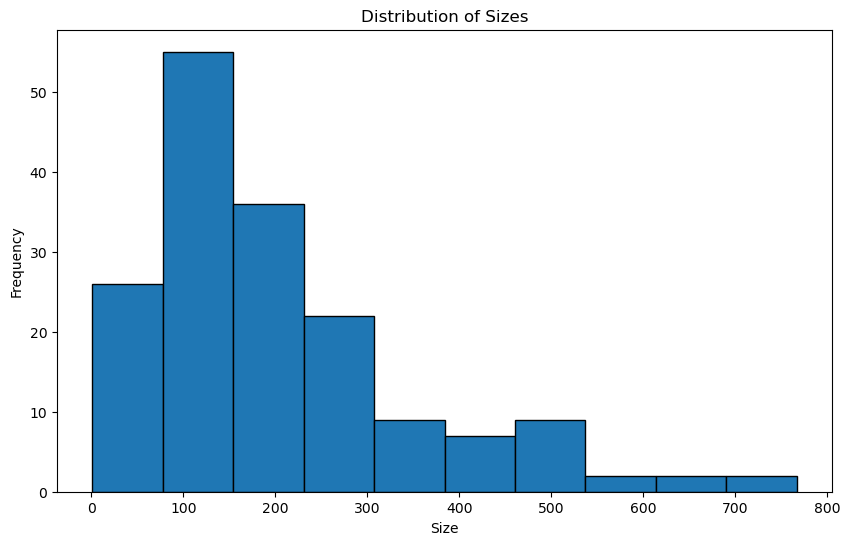

In [78]:
import matplotlib.pyplot as plt

# Data
# sizes = [2660, 173, 2926, 1486, 4010, 1478, 4313, 1688, 2009, 2329, 589, 924, 407, 920, 625, 1696, 320, 1580, 1822, 999, 273, 288, 182, 263, 290, 181, 296]
sizes = list(community_sizes.values())
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(sizes, bins=10, edgecolor='black')
plt.title('Distribution of Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()


# Removing Total Ouliers

In [79]:
kg = utils.load_kg('beauty')
analyzer = CommunityAnalyzer(kg.G)
G = analyzer.build_graph(kg.G)

In [80]:
from collections import Counter
partition = community_louvain.best_partition(G,random_state=42)
community_sizes = Counter(partition.values())
len(community_sizes)

25

In [81]:
degree_centrality = adjusted_degree_centrality(G)
degree_centrality

{'product_0': 0.0014354767833601875,
 'category_0': 1.0,
 'category_4': 0.25675675675675674,
 'category_17': 0.0472972972972973,
 'category_18': 0.010135135135135136,
 'category_19': 0.005067567567567568,
 'brand_1': 0.006756756756756757,
 'word_849': 0.011824324324324325,
 'word_1065': 0.07263513513513513,
 'word_1418': 0.07432432432432433,
 'word_1627': 0.013513513513513514,
 'word_1715': 0.02027027027027027,
 'word_2079': 0.060810810810810814,
 'word_2161': 0.005067567567567568,
 'word_2637': 0.013513513513513514,
 'word_2930': 0.0016891891891891893,
 'word_2940': 0.09966216216216216,
 'word_3316': 0.010135135135135136,
 'word_3614': 0.0016891891891891893,
 'word_4268': 0.02027027027027027,
 'word_4421': 0.07939189189189189,
 'word_4837': 0.015202702702702704,
 'word_4852': 0.06756756756756757,
 'word_4866': 0.030405405405405407,
 'word_5320': 0.015202702702702704,
 'word_5653': 0.005067567567567568,
 'word_8247': 0.08108108108108109,
 'word_8524': 0.0033783783783783786,
 'word_9059

In [82]:
import networkx as nx
import numpy as np

def remove_centrality_outliers(G, centrality_dict, method='std_dev', num_std_dev=2, top_n=10):
    """
    Remove outliers from the graph G based on centrality values using specified methods and return the removed nodes.

    Parameters:
    - G: A NetworkX graph.
    - centrality_dict: Dictionary of centrality values of the nodes in G.
    - method: Method to use for outlier removal ('std_dev', 'top_n', 'iqr').
    - num_std_dev: Number of standard deviations to use as the cutoff (used if method='std_dev').
    - top_n: Number of top highest centrality nodes to remove (used if method='top_n').

    Returns:
    - A new graph with outliers removed.
    - A dictionary of removed nodes and their centrality values.
    """
    centrality_values = list(centrality_dict.values())
    removed_nodes = {}

    if method == 'std_dev':
        mean_centrality = np.mean(centrality_values)
        std_dev_centrality = np.std(centrality_values)
        lower_bound = mean_centrality - num_std_dev * std_dev_centrality
        upper_bound = mean_centrality + num_std_dev * std_dev_centrality
        filter_func = lambda x: lower_bound <= x <= upper_bound
    elif method == 'top_n':
        sorted_centralities = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
        cutoff_value = sorted_centralities[min(top_n - 1, len(sorted_centralities) - 1)][1]
        filter_func = lambda x: x <= cutoff_value
        # Collect top_n outliers
        for node, centrality in sorted_centralities[:top_n]:
            removed_nodes[node] = centrality
    elif method == 'iqr':
        Q1 = np.percentile(centrality_values, 25)
        Q3 = np.percentile(centrality_values, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filter_func = lambda x: lower_bound <= x <= upper_bound
    else:
        raise ValueError("Invalid method specified. Choose 'std_dev', 'top_n', or 'iqr'.")

    # Create a new graph without outliers
    G_new = nx.Graph()
    for node, centrality in centrality_dict.items():
        if filter_func(centrality):
            G_new.add_node(node)
        else:
            if method != 'top_n':  # For top_n, outliers are already collected
                removed_nodes[node] = centrality
    
    # Add edges for the remaining nodes
    G_new.add_edges_from((u, v) for u, v in G.edges() if u in G_new and v in G_new)

    return G_new, removed_nodes

In [83]:
G_clean_std, removed_std = remove_centrality_outliers(G, centrality_dict, method='std_dev')
G_clean_top, removed_top = remove_centrality_outliers(G, centrality_dict, method='top_n', top_n=1)
G_clean_iqr, removed_iqr = remove_centrality_outliers(G, centrality_dict, method='iqr')

In [84]:
print(len(G_clean_top))
print(len(G))

34727
34727


In [85]:
partition = community_louvain.best_partition(G_clean_top,random_state=42)
community_sizes = Counter(partition.values())
len(community_sizes)

25

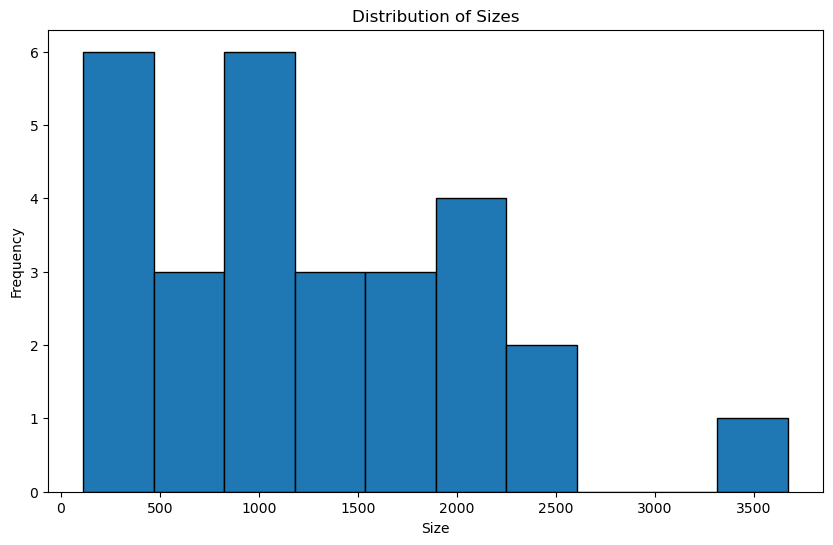

In [59]:
import matplotlib.pyplot as plt

# Data
# sizes = [2660, 173, 2926, 1486, 4010, 1478, 4313, 1688, 2009, 2329, 589, 924, 407, 920, 625, 1696, 320, 1580, 1822, 999, 273, 288, 182, 263, 290, 181, 296]
sizes = list(community_sizes.values())
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(sizes, bins=10, edgecolor='black')
plt.title('Distribution of Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()


In [60]:
# Step 1: Create a dictionary to hold sets of nodes for each community
community_dict = {}

# Step 2: Populate the dictionary with sets of nodes based on community IDs
for node, community_id in partition.items():
# for (node, _), community_id in partition.items():
    if community_id not in community_dict:
        community_dict[community_id] = set()
    community_dict[community_id].add(node)

# Step 3: Convert the dictionary to a list of sets
community_list = list(community_dict.values())


analyze_community_sizes(community_list)

Average community size: 1233.607142857143
Standard deviation of sizes: 849.7103850844759
Large communities (sizes): [3672]
Small communities (sizes): []


([{'related_product_14288',
   'related_product_20500',
   'related_product_17724',
   'word_4088',
   'related_product_13996',
   'related_product_14037',
   'related_product_14022',
   'word_7436',
   'related_product_7671',
   'related_product_12209',
   'related_product_23135',
   'related_product_4065',
   'related_product_1984',
   'related_product_6418',
   'word_7676',
   'related_product_5282',
   'word_1557',
   'word_4783',
   'related_product_6128',
   'related_product_1741',
   'related_product_1826',
   'brand_184',
   'related_product_12964',
   'related_product_2082',
   'related_product_5745',
   'related_product_2008',
   'word_9408',
   'related_product_18265',
   'related_product_441',
   'product_411',
   'word_7463',
   'related_product_19677',
   'related_product_14052',
   'related_product_18197',
   'word_264',
   'word_7385',
   'related_product_17473',
   'related_product_8630',
   'word_5257',
   'related_product_19303',
   'brand_28',
   'related_product_12

In [61]:
removed_nodes

{'category_0': 1.0,
 'category_4': 0.25675675675675674,
 'category_17': 0.0472972972972973,
 'word_849': 0.011824324324324325,
 'word_1065': 0.07263513513513513,
 'word_1418': 0.07432432432432433,
 'word_1627': 0.013513513513513514,
 'word_1715': 0.02027027027027027,
 'word_2079': 0.060810810810810814,
 'word_2637': 0.013513513513513514,
 'word_2940': 0.09966216216216216,
 'word_4268': 0.02027027027027027,
 'word_4421': 0.07939189189189189,
 'word_4837': 0.015202702702702704,
 'word_4852': 0.06756756756756757,
 'word_4866': 0.030405405405405407,
 'word_5320': 0.015202702702702704,
 'word_8247': 0.08108108108108109,
 'word_9059': 0.02027027027027027,
 'word_10123': 0.02702702702702703,
 'word_10336': 0.07601351351351351,
 'word_10337': 0.04560810810810811,
 'category_14': 0.34290540540540543,
 'category_23': 0.07432432432432433,
 'category_24': 0.06925675675675676,
 'category_28': 0.060810810810810814,
 'word_381': 0.03885135135135135,
 'word_680': 0.04391891891891892,
 'word_905': 0.08

In [64]:
calculate_modularity(G_clean_top)

0.5221378641768011

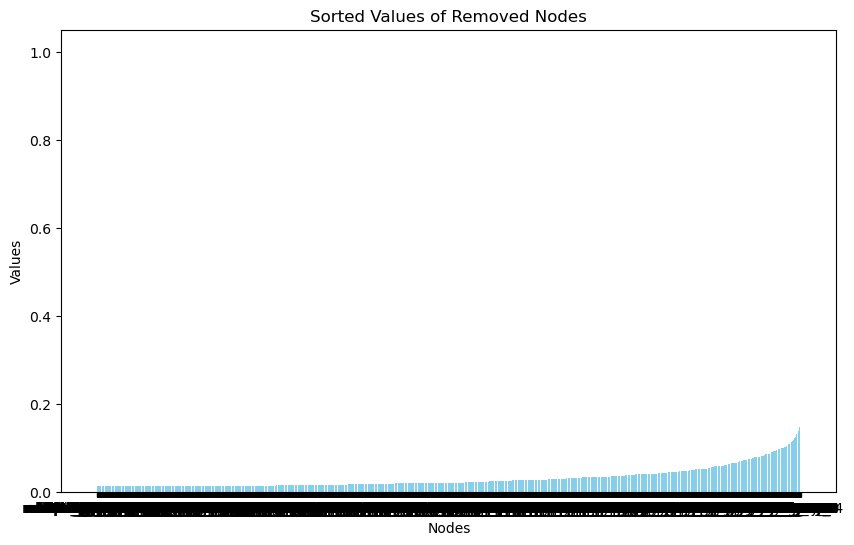

In [48]:
# Sort the dictionary by values
sorted_removed_nodes = dict(sorted(removed_nodes.items(), key=lambda x: x[1]))

# Extract sorted keys and values
labels = list(sorted_removed_nodes.keys())
values = list(sorted_removed_nodes.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')

# Add titles and labels
plt.title('Sorted Values of Removed Nodes')
plt.xlabel('Nodes')
plt.ylabel('Values')

# Show the plot
plt.show()

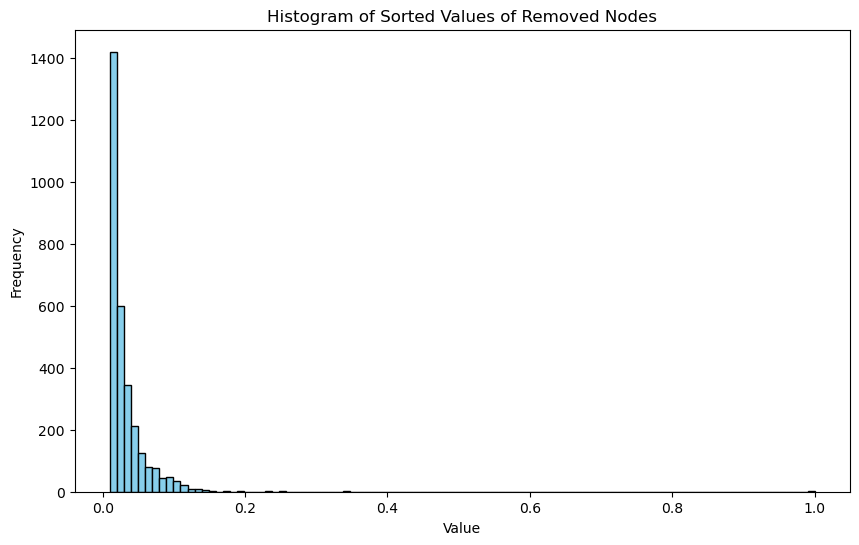

In [53]:
# Sort the dictionary by values
sorted_removed_nodes = dict(sorted(removed_nodes.items(), key=lambda x: x[1]))

# Extract sorted values
values = list(sorted_removed_nodes.values())

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(values, bins=0, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Sorted Values of Removed Nodes')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [86]:
def analyze_graph_and_communities(G, centrality_dict, method='top_n', top_n=10):
    """
    Cleans the graph based on specified outlier removal method, analyzes community structures,
    and plots the distribution of community sizes and removed node centrality values.
    
    Parameters:
    - G: A NetworkX graph.
    - centrality_dict: Dictionary of centrality values of the nodes in G.
    - method: Method for outlier removal ('std_dev', 'top_n', 'iqr').
    - top_n: Number of top highest centrality nodes to remove if method='top_n'.
    """
    # Remove outliers based on centrality and get the cleaned graph and removed nodes
    G_clean, removed_nodes = remove_centrality_outliers(G, centrality_dict, method=method, top_n=top_n)

    print("Size of the cleaned graph:", len(G_clean))
    print("Original graph size:", len(G))

    print("\nThe initial Modularity ")

    # Community detection using Louvain method
    partition = community_louvain.best_partition(G_clean, random_state=42)
    community_sizes = Counter(partition.values())

    # Plot the distribution of community sizes
    plt.figure(figsize=(10, 6))
    plt.hist(list(community_sizes.values()), bins=10, edgecolor='black')
    plt.title('Distribution of Community Sizes')
    plt.xlabel('Size')
    plt.ylabel('Frequency')
    plt.show()

    # Organize nodes by community
    community_dict = {}
    for node, community_id in partition.items():
        if community_id not in community_dict:
            community_dict[community_id] = set()
        community_dict[community_id].add(node)
    community_list = list(community_dict.values())

    # Analyze community sizes
    analyze_community_sizes(community_list)  # Assuming a function 'analyze_community_sizes' exists

    # Sort removed nodes by centrality values
    sorted_removed_nodes = dict(sorted(removed_nodes.items(), key=lambda item: item[1], reverse=True))

    # Plotting histogram of centrality values of removed nodes
    plt.figure(figsize=(10, 6))
    plt.hist(list(sorted_removed_nodes.values()), bins=10, color='skyblue', edgecolor='black')
    plt.title('Histogram of Sorted Values of Removed Nodes')
    plt.xlabel('Centrality Value')
    plt.ylabel('Frequency')
    plt.show()

Size of the cleaned graph: 33714
Original graph size: 34727


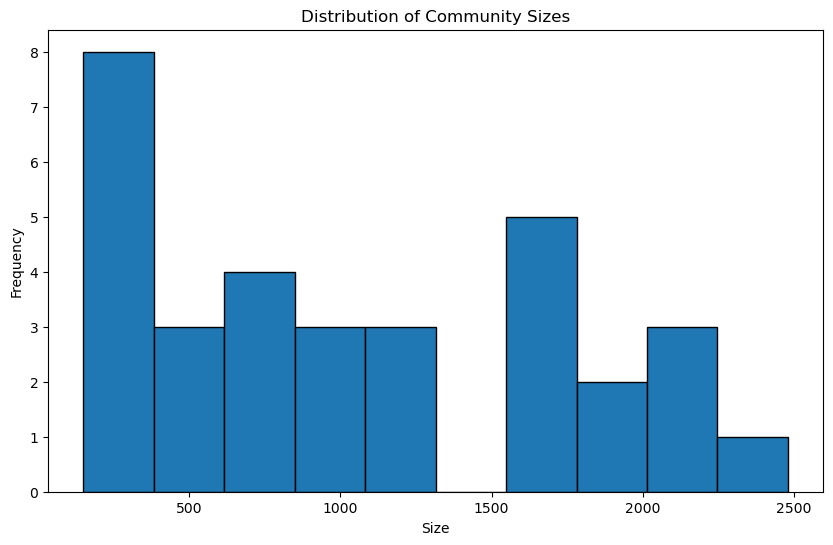

Average community size: 1053.5625
Standard deviation of sizes: 723.4726125388231
Large communities (sizes): []
Small communities (sizes): []
Minimum community size: 149
Maximum community size: 2481


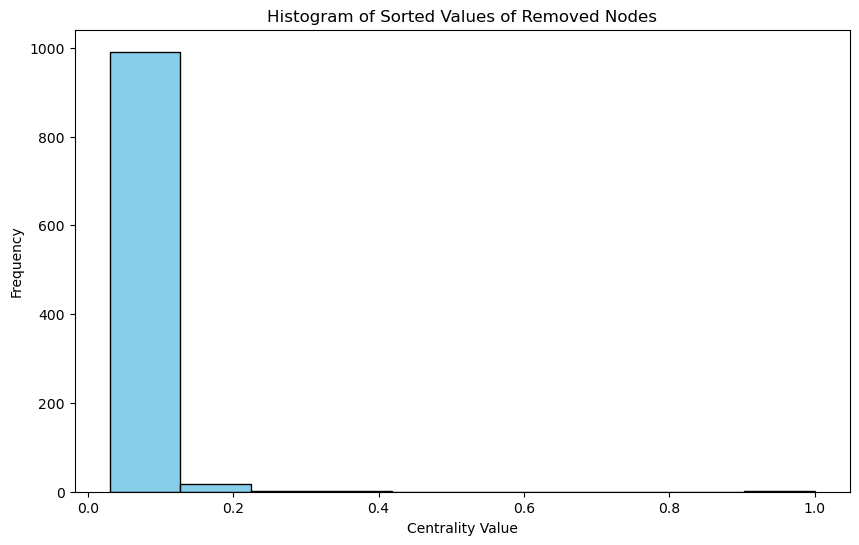

In [87]:
analyze_graph_and_communities(G, degree_centrality, method='std_dev')